                                    Machine Learning with Imbalanced Dataset

IMBALANCED DATASET - The dataset may contain uneven samples /instances , so that it makes the algorithm to predict with accuracy of 1.0 each time u run the model. For example, if u have simple dataset with 4 features and output(target) feature with 2 class, then total no. of instances/samples be 100. Now, out of 100, 80 instances belongs to category1 of the output(target) feature and only 20 instances contribute to the category2 of the output(target) feature. So, obviously, this makes bias in training and predicting the model. So, this dataset refers to Imbalanced dataset.



Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

file = pd.read_csv("ecoli.csv")
print(file.head())

    Mcg   Gvh   Lip  Chg   Aac  Alm1  Alm2     Class
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35  positive
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44  positive
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46  positive
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36  positive
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35  positive


Checking whether any column in the dataset contains NaN values.

In [15]:
file.isnull().values.any()

False

Computing the Basic Statistics(Descriptive) of the "Class" feature in the dataset. It shows that there are two unique values(positive and negative), with positive value counts upto 143 and negative 77.

In [16]:
file['Class'].describe()

count    220.000000
mean       0.650000
std        0.478057
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

Now, we just grouped the datset based on the 'class' feature to visualize the counts of positive and negative values.

In [2]:
f = file.groupby("Class")
f.count()

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2
Class,,,,,,,
negative,77,77,77,77,77,77,77
positive,143,143,143,143,143,143,143


We are converting the 'class' feature from text to int using .map function.

In [4]:
file['Class'] = file['Class'].map({'positive': 1, 'negative': 0})
print(file['Class'].head())

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


Now using the Seaborn's pairplot, we can visualize the features plotted against each other.

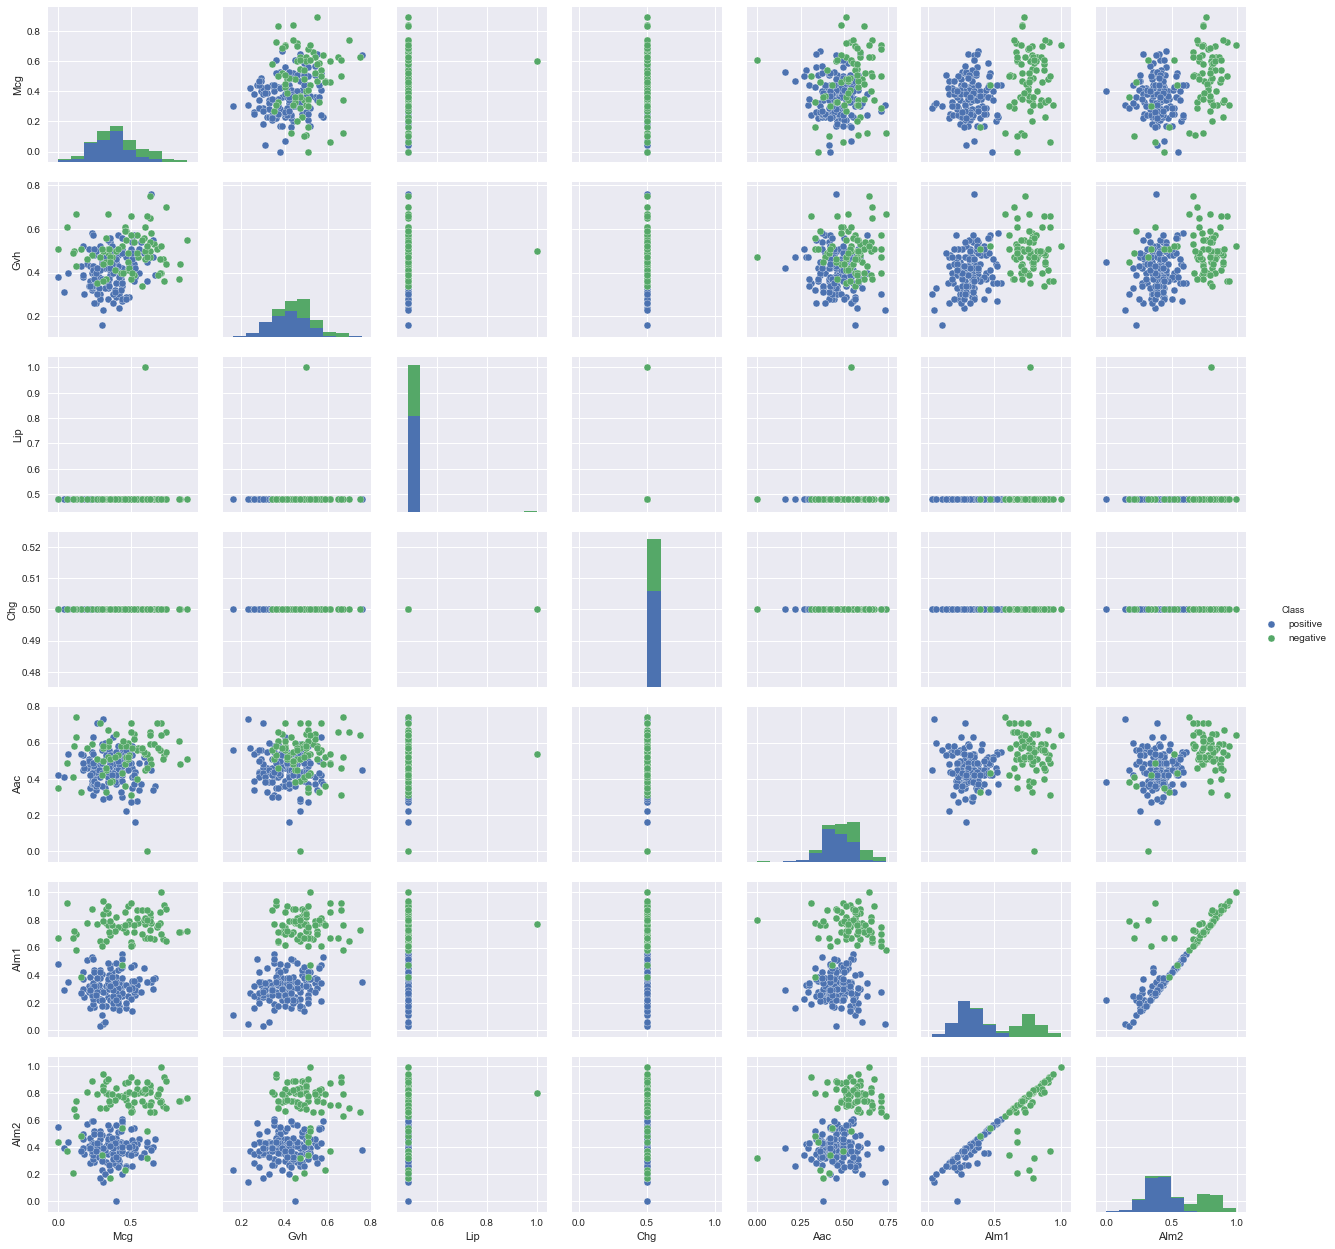

In [32]:
sns.pairplot(file,hue='Class')

Now using the sklearn library, we import train_test_test from cross validation and split the original dataset into training and test dataset(80,20).

In [5]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2)
features_train=train[['Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2']]
features_test = test[['Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2']]
labels_train = train.Class
labels_test = test.Class
print(train.shape)
print(test.shape)
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)
print(labels_test.head())

(176, 8)
(44, 8)
(176, 7)
(44, 7)
(176,)
(44,)
65     1
33     1
121    1
172    0
197    0
Name: Class, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now using the RandomForest Classifier we can select the most important features in the dataset.

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(features_train, labels_train)
feature_labels = ['Mcg','Gvh','Lip','Chg','Aac','Alm1','Alm2']
for feature in zip(feature_labels,model.feature_importances_):
    print(feature)

('Mcg', 0.20951777384428608)
('Gvh', 0.20707346208561445)
('Lip', 0.012441702752942896)
('Chg', 0.0)
('Aac', 0.27706112782727904)
('Alm1', 0.15604494684526365)
('Alm2', 0.13786098664461391)


As you can see, the feature 'Chg' is contributing very low. So we can slice the dataset with only limited features. 

In [22]:
new_file = file[['Mcg','Gvh','Lip','Aac','Alm1','Alm2','Class']]
new_file.head()

,Mcg,Gvh,Lip,Aac,Alm1,Alm2,Class
0,0.49,0.29,0.48,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.55,0.25,0.35,1


Now once again, using the sklearn library, we import train_test_test from cross validation and split the new sliced dataset into training and test dataset(80,20).

In [23]:
train, test = train_test_split(new_file,test_size=0.2)
new_features_train=train[['Mcg','Gvh','Lip','Aac','Alm1','Alm2']]
new_features_test = test[['Mcg','Gvh','Lip','Aac','Alm1','Alm2']]
labels_train = train.Class
labels_test = test.Class
print(train.shape)
print(test.shape)
print(new_features_train.shape)
print(new_features_test.shape)
print(labels_train.shape)
print(labels_test.shape)
print(labels_test.head())

(176, 7)
(44, 7)
(176, 6)
(44, 6)
(176,)
(44,)
144    0
53     1
69     1
67     1
38     1
Name: Class, dtype: int64


Now using Random forest Classifier and Logistic Regression we calculate the accuracy.

In [24]:
clf = RandomForestClassifier()
model = clf.fit(new_features_train, labels_train)
print("Accuracy of Randomforest Classifier:",clf.score(new_features_test,labels_test))

Accuracy of Randomforest Classifier: 0.977272727273


In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(new_features_train, labels_train)
print('Accuracy:',clf.score(new_features_test,labels_test))


Accuracy: 0.977272727273


As you see, both the classifiers accuracy points to 97%, which is biased due to the fact that there are 143 POSITIVE classes and 77 NEGATIVE classes. So this creates the biased results. So, this is a Imbalanced DataSet.

There two main ways to handle the Imbalanced datset:

1.Over Sampling  

2.Under Sampling  

OVER SAMPLING:  

It is nothing but Sampling the minority class and making it equivalent to the majority class Ex:before sampling: Counter({1: 111, 0: 65}) after sampling: Counter({1: 111, 0: 111}) Note:The counts of 1's and 0's before and after sampling

UNDER SAMPLING:  

It is nothing but Sampling the majority class and making it equivalent to the minority class Ex:before sampling: Counter({1: 111, 0: 65}) after sampling: Counter({0: 65, 1: 65})

There are several algorithms for over sampling and under sampling. The one we use here is,  

OVER SAMPLING ALGORITHM:  

1.SMOTE - Synthetic Minority Over Sampling Technique A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models

UNDER SAMPLING ALGORITHM:  

1.RandomUnderSampler - Random Undersampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

2.NearMiss - selects the majority class samples whose average distances to three closest minority class samples are the smallest.

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(new_features_train, labels_train)
print("before sampling:",format(Counter(labels_train)))
print("after sampling:",format(Counter(y_resampled)))

before sampling: Counter({1: 115, 0: 61})
after sampling: Counter({1: 115, 0: 115})


Now you can see that, the accuracy of both the classifiers drops down to 95% which the correct accuracy for this imbalanced dataset.

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)
print('Accuracy:',clf.score(new_features_test,labels_test))


Accuracy: 0.954545454545


In [28]:
clf = RandomForestClassifier()
model = clf.fit(X_resampled, y_resampled)
print("Accuracy of Randomforest Classifier:",clf.score(new_features_test,labels_test))

Accuracy of Randomforest Classifier: 0.954545454545
